In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

Warning message:
“package ‘data.table’ was built under R version 4.2.3”


In [2]:
strats = fread('stratified_genome_metadata.tsv')
setnames(strats, 'genome_ID', 'genome')

In [3]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'map2b', 'metabuli')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202
correct_taxonomy_tools = c('singlem', 'metaphlan', 'kraken', 'sourmash', 'metabuli')

publication_names = data.table(
    tool = tools,
    publication_name = c('SingleM', 'MetaPhlAn', 'mOTUs', 'Kraken2', 'sourmash', 'Kaiju', 'MAP2B', 'Metabuli')
)
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

In [4]:
d1 = data.table(expand.grid(tool=tools, genome=strats$genome))
d1[, method := 'relabund']
d1[tool=='kraken', method := 'reads_wise']
d1[tool=='kaiju', method := 'reads_wise']
d1[tool=='metabuli', method := 'reads_wise']
d1[1:3]

tool,genome,method
<fct>,<fct>,<chr>
singlem,GCA_019422935.1_genomic,relabund
metaphlan,GCA_019422935.1_genomic,relabund
motus,GCA_019422935.1_genomic,relabund


In [5]:
# output_singlem/opal/GCA_022615805.1_genomic.opal_report
d2 = d1[, fread(paste('output_',tool,sep='','/opal/',genome,'.',method,'.opal_report')), by=list(tool,genome)]
d2[1:3]

tool,genome,tool,rank,metric,sample,value
<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [6]:
dim(d2)

[1] 173213      7

In [7]:
setnames(d2, c('tool','genome','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, genome, rank, metric, value)]
d3[1:3]
dim(d3)

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.02158635
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.01907911
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.01907911


[1] 85853     5

In [8]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 6720    5

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.02158635
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.01907911
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.01907911
singlem,GCA_019422935.1_genomic,order,Bray-Curtis distance,0.01907911
singlem,GCA_019422935.1_genomic,family,Bray-Curtis distance,0.01907911
singlem,GCA_019422935.1_genomic,genus,Bray-Curtis distance,0.01938776
singlem,GCA_019422935.1_genomic,species,Bray-Curtis distance,0.46978973
metaphlan,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.11769970
metaphlan,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.11769970


In [9]:
bc2 = merge(bc, strats, by='genome')
bc2[1:10]

genome,tool,rank,metric,value,novelty_category,taxonomy
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.01069379,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.42328520,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.41803279,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,order,Bray-Curtis distance,0.38459069,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,family,Bray-Curtis distance,0.33805249,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,genus,Bray-Curtis distance,0.33805249,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,species,Bray-Curtis distance,0.33805249,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,kingdom,Bray-Curtis distance,0.50000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,phylum,Bray-Curtis distance,0.50000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095


In [10]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novel_orders = gsub('^','novel ',orders)
bc2[, rank := factor(rank, levels=orders)]
bc2[, novelty_category := factor(novelty_category, levels=orders)]

In [11]:
bc2[, kingdom := gsub('d__', 'novel ', gsub(';.*','',taxonomy))]
bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]
bc2[1:3]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.01069379,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.42328520,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.41803279,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


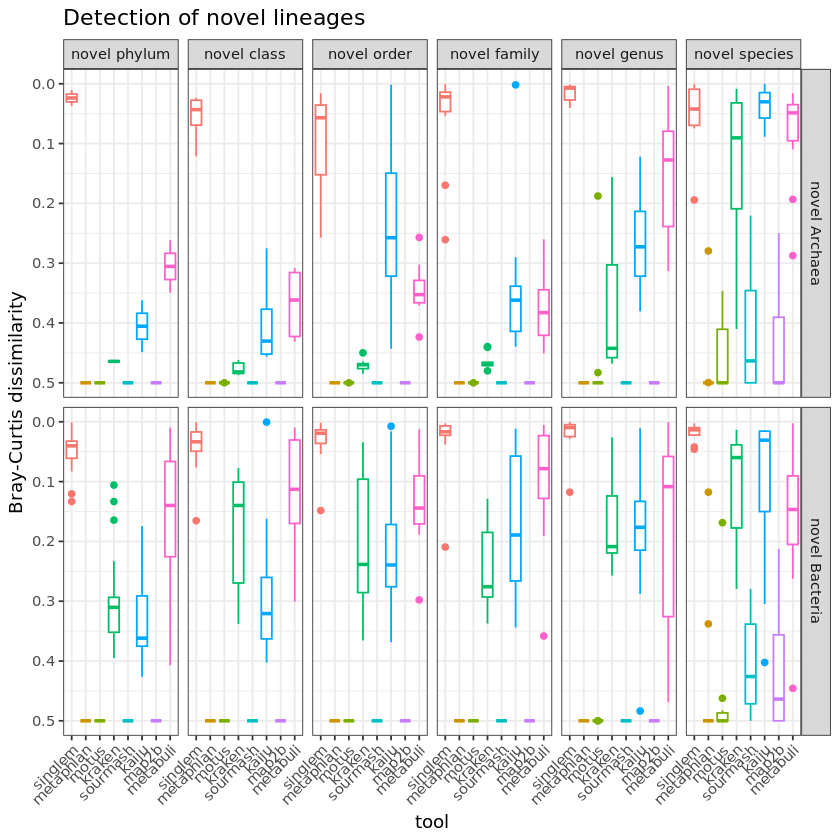

In [12]:
qplot(data=bc2[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [ ]:
# stats
bc2[rank=='kingdom', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.04351235,0.05334768
metaphlan,0.49362297,0.04261880
motus,0.49044731,0.04571271
kraken,0.27954405,0.15293540
sourmash,0.48518123,0.05004344
kaiju,0.24045880,0.14395697
map2b,0.48843943,0.04747874
metabuli,0.18647643,0.14000025


In [ ]:
bc2[rank=='kingdom' & kingdom=='novel Archaea', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.05502409,0.06714625
metaphlan,0.49539845,0.03182093
motus,0.48417052,0.05381596
kraken,0.38186192,0.15333929
sourmash,0.48164699,0.05983056
kaiju,0.24934647,0.15670072
map2b,0.48852136,0.04648863
metabuli,0.25755193,0.14192878


In [15]:
bc2[rank=='kingdom' & kingdom=='novel Bacteria', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03583785,0.04044894
metaphlan,0.49243932,0.04868757
motus,0.49463184,0.03925311
kraken,0.21133213,0.10881535
sourmash,0.48753739,0.04258747
kaiju,0.23453369,0.13561025
map2b,0.48838480,0.04845164
metabuli,0.13909276,0.11757601


In [16]:
bc2[rank=='kingdom' & novelty_category=='species', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03548711,0.04409406
metaphlan,0.46173783,0.10045873
motus,0.45914943,0.08221544
kraken,0.12539310,0.11954870
sourmash,0.41108740,0.09354415
kaiju,0.07185612,0.10570217
map2b,0.43063656,0.09948958
metabuli,0.12243781,0.11450549


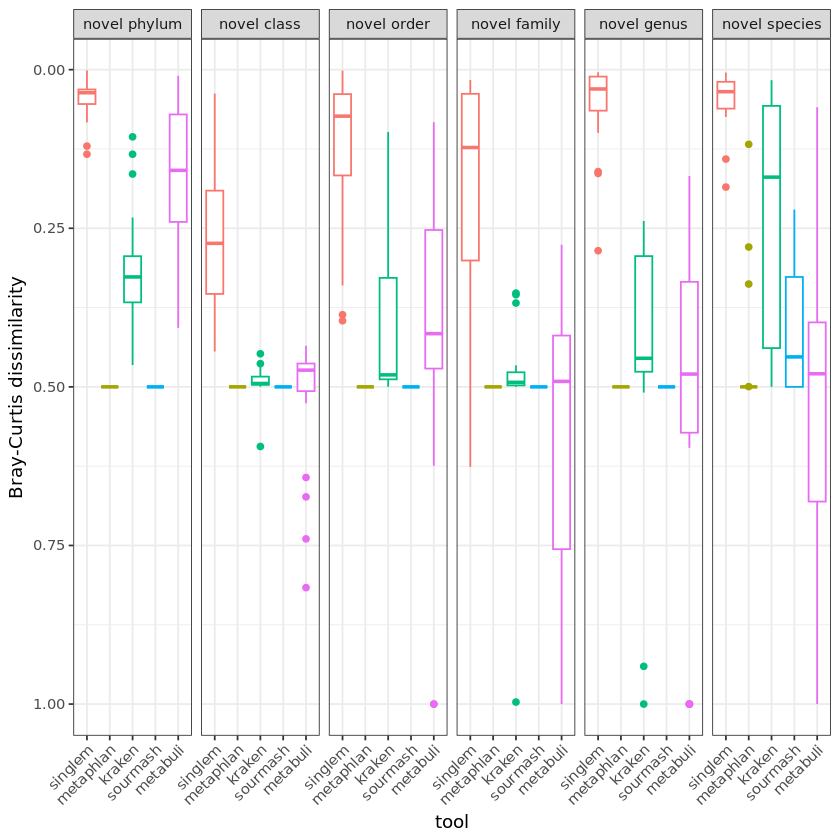

In [17]:
# What about when the rank equals the novelty category?
qplot(data=bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]], ylab='Bray-Curtis dissimilarity', tool, colour=tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [18]:
# stats
bc2[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.1237015,0.13677922
metaphlan,0.4936230,0.04261880
kraken,0.3970911,0.16898165
sourmash,0.4853126,0.04951653
metabuli,0.4536195,0.25713407


In [19]:
bc2[tool %in% correct_taxonomy_tools][tool != 'singlem'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)][,.(ave=mean(ave), sd=mean(sd))]

ave,sd
<dbl>,<dbl>
0.4574116,0.1295628


In [20]:
bc2[tool == 'singlem' & novelty_category_novel=='novel class'][rank==orders[as.numeric(novelty_category)-1]][order(-value)]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_021803575.1_genomic,singlem,phylum,Bray-Curtis distance,0.44427164,class,d__Bacteria;p__Bacillota_E;c__JAJZYS01;o__JAJZYS01;f__JAJZLH01;g__JAJZLH01;s__JAJZLH01 sp021803575,novel Bacteria,novel class
GCA_024720975.1_genomic,singlem,phylum,Bray-Curtis distance,0.44085326,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JANJXX01;s__JANJXX01 sp024720975,novel Archaea,novel class
GCA_021163045.1_genomic,singlem,phylum,Bray-Curtis distance,0.41925777,class,d__Archaea;p__Thermoproteota;c__JANJXX01;o__JANJXX01;f__JANJXX01;g__JAGGXM01;s__JAGGXM01 sp021163045,novel Archaea,novel class
GCA_022763185.1_genomic,singlem,phylum,Bray-Curtis distance,0.38064948,class,d__Bacteria;p__Bdellovibrionota;c__JALEGL01;o__JALEGL01;f__JALEGL01;g__JALEGL01;s__JALEGL01 sp022763185,novel Bacteria,novel class
GCA_021162905.1_genomic,singlem,phylum,Bray-Curtis distance,0.36948075,class,d__Archaea;p__Asgardarchaeota;c__JAGGXT01;o__JAGGXT01;f__JAGGXT01;g__JAGGXT01;s__JAGGXT01 sp021162905,novel Archaea,novel class
GCA_022072165.1_genomic,singlem,phylum,Bray-Curtis distance,0.34815844,class,d__Bacteria;p__4484-113;c__JAJVIF01;o__JAJVIF01;f__JAJVIF01;g__JAJVIF01;s__JAJVIF01 sp022072165,novel Bacteria,novel class
GCA_023475165.1_genomic,singlem,phylum,Bray-Curtis distance,0.33616299,class,d__Bacteria;p__Bacillota_E;c__JAMCWA01;o__JAMCWA01;f__JAMCWA01;g__JAMCWA01;s__JAMCWA01 sp023475165,novel Bacteria,novel class
GCA_021787335.1_genomic,singlem,phylum,Bray-Curtis distance,0.31946108,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJZPE01;g__JAJZPE01;s__JAJZPE01 sp021787335,novel Bacteria,novel class
GCA_021811325.1_genomic,singlem,phylum,Bray-Curtis distance,0.30849522,class,d__Bacteria;p__Bacillota_E;c__JAJYWN01;o__JAJYWN01;f__JAJZPE01;g__JAJZPE01;s__JAJZPE01 sp021811325,novel Bacteria,novel class


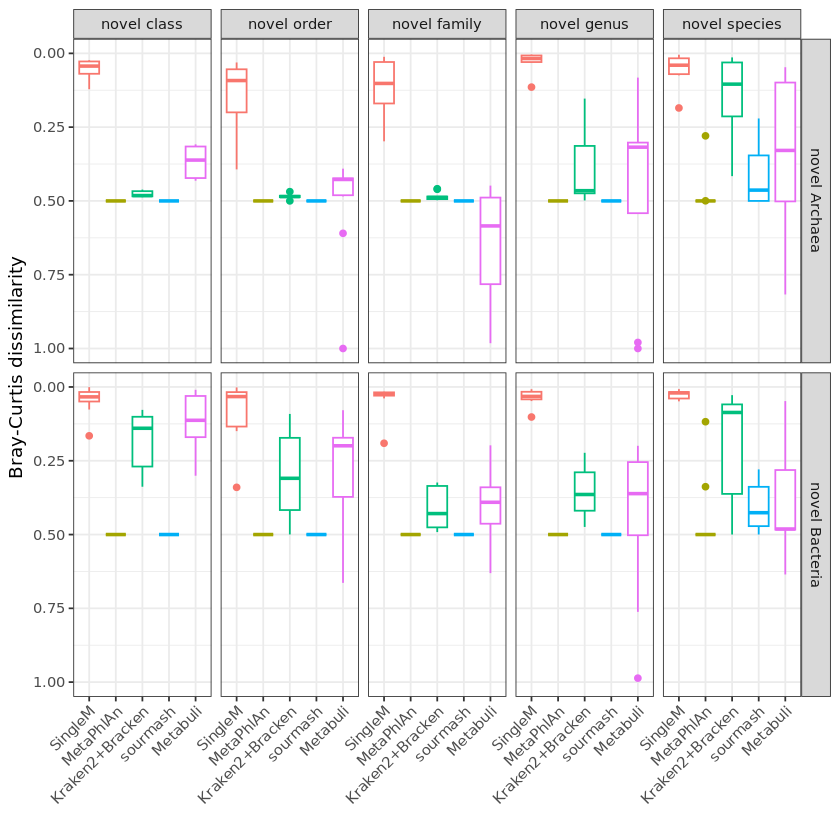

In [21]:
# What about when the rank equals one level above the novelty category?
bc2[tool=='singlem', tool2 := 'SingleM']
bc2[tool=='metaphlan', tool2 := 'MetaPhlAn']
bc2[tool=='motus', tool2 := 'mOTUs']
bc2[tool=='kraken', tool2 := 'Kraken2+Bracken']
bc2[tool=='sourmash', tool2 := 'sourmash']
bc2[tool=='kaiju', tool2 := 'Kaiju']
bc2[tool=='coverm', tool2 := 'CoverM']
bc2[tool=='metabuli', tool2 := 'Metabuli']
tools2_order = c('SingleM','MetaPhlAn','Kraken2+Bracken','sourmash','Metabuli')
bc2[, tool2 := factor(tool2, levels=tools2_order)]

bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]], colour=tool, ylab='Bray-Curtis dissimilarity', tool2, value, geom='boxplot', xlab='')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [22]:
bc2[tool %in% correct_taxonomy_tools][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.06044094,0.07302508
metaphlan,0.49234757,0.04662022
kraken,0.33065695,0.16402916
sourmash,0.48221748,0.05437866
metabuli,0.38206751,0.23968406


In [23]:
# Write out data for plotting benchmarks altogether
fwrite(bc2, 'bray_curtis.tsv', sep='\t')

# How much does SingleM over-classify to the species level?

In [24]:
# Read in the singlem .profile file for each species
profiles = data.table(expand.grid(tool=tools, genome=strats$genome))
profiles2 = profiles[, fread(paste('output_',tool,'/',tool,'/',genome,'.profile',sep=''), sep='\t',colClasses=c('character','numeric','character')), by=.(tool,genome)]
profiles2[1:3]

tool,genome,sample,coverage,taxonomy
<fct>,<fct>,<chr>,<dbl>,<chr>
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.32,Root; d__Archaea
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.21,Root; d__Bacteria
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.05,Root; d__Archaea; p__Halobacteriota; c__Halobacteria; o__Halobacteriales; f__Haloferacaceae


In [25]:
# Only care about s__ entries. Then order by abundance reverse, remove the top one.
get_abundance_of_non_top_species = function(sd) {
    # sd[, is_non_novel := F]
    # sd[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
    # sd[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]
    return(sd[is_non_novel==F, sum(coverage)] / sum(sd$coverage))
    # print(sd)
    # if (nrow(sd) == 1) {
    #     return(0)
    # } else {
    #     return(sd[2:nrow(sd), sum(coverage)] / sum(sd$coverage[1]))
    # }
}
profiles2[, is_non_novel := F]

# Read genome_pairs.tsv and extract
genome_pairs = fread('genome_pairs.tsv',sep='\t')
for (tax in genome_pairs$paired_taxonomy){
    profiles2[grep(gsub('.*;','',tax), taxonomy), is_non_novel := T]
}
# profiles2[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
# profiles2[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]

overclassification_rates = profiles2[grep('s__',taxonomy)][order(-coverage)][,.(overclassification=get_abundance_of_non_top_species(.SD)), by=.(tool,genome)]
summary(overclassification_rates[tool=='singlem']$overclassification)

overclassification_rates[tool=='singlem'][overclassification > 0.3]
table(overclassification_rates$tool)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.02835 0.00000 0.43229 

tool,genome,overclassification
<fct>,<fct>,<dbl>
singlem,GCA_020161365.1_genomic,0.4320242
singlem,GCF_021184045.1_genomic,0.3959538
singlem,GCA_020860125.1_genomic,0.3158254
singlem,GCA_019422935.1_genomic,0.4322946
singlem,GCA_019459085.1_genomic,0.3863636
singlem,GCF_024707485.1_genomic,0.3589269
singlem,GCA_023379805.1_genomic,0.3164933



  singlem metaphlan     motus    kraken  sourmash     kaiju     map2b  metabuli 
      120       120       120       120       120       120       120       120 

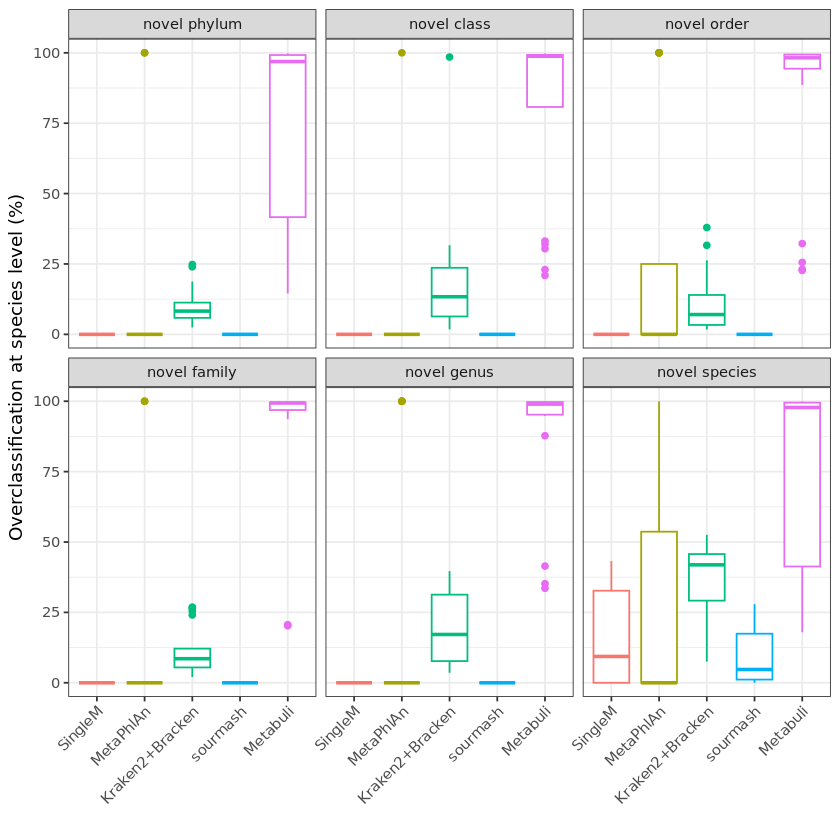

In [26]:
# What about per-taxon level?
overclassification_rates2 = merge(overclassification_rates, strats, by='genome')

overclassification_rates2[tool=='singlem', tool2 := 'SingleM']
overclassification_rates2[tool=='metaphlan', tool2 := 'MetaPhlAn']
overclassification_rates2[tool=='motus', tool2 := 'mOTUs']
overclassification_rates2[tool=='kraken', tool2 := 'Kraken2+Bracken']
overclassification_rates2[tool=='sourmash', tool2 := 'sourmash']
overclassification_rates2[tool=='kaiju', tool2 := 'Kaiju']
overclassification_rates2[tool=='coverm', tool2 := 'CoverM']
overclassification_rates2[tool=='map2b', tool2 := 'MAP2B']
overclassification_rates2[tool=='metabuli', tool2 := 'Metabuli']
tools2_order = c('SingleM','MetaPhlAn','mOTUs','Kraken2+Bracken','sourmash','Kaiju','CoverM','Metabuli')
overclassification_rates2[, tool2 := factor(tool2, levels=tools2_order)]

overclassification_rates2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]

qplot(data=overclassification_rates2[tool %in% correct_taxonomy_tools][tool != 'coverm'], tool2, overclassification*100, ylab='Overclassification at species level (%)', xlab='', geom='boxplot', colour=tool2)+facet_wrap(~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')

In [27]:
# So at the novel species level
summary(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])
sd(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='metaphlan'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='motus'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='kraken'][novelty_category=='species', overclassification])
summary(overclassification_rates2[tool=='sourmash'][novelty_category=='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.09352 0.17011 0.32710 0.43229 

[1] 0.1803984

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2883  0.5367  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.75    1.00    0.75    1.00    1.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0751  0.2918  0.4189  0.3608  0.4572  0.5253 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01139 0.04724 0.08928 0.17435 0.27944 

In [28]:
# Overclassification to species level of kraken when genome is more novel than species-level
summary(overclassification_rates2[tool=='kraken'][novelty_category!='species', overclassification])
sd(overclassification_rates2[tool=='kraken'][novelty_category!='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01748 0.05769 0.09099 0.13784 0.21237 0.98506 

[1] 0.130568